<a href="https://colab.research.google.com/github/axviolyn/Data-Mining/blob/main/Praktikum2Mandiri_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Menghubungkan Drive dengan Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Mengimpor file Drive

file_path = '/content/drive/MyDrive/DatasetDM/diabetes.csv'

In [7]:
# Membaca data

import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/DatasetDM/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
# Menghitung statistik deskriptif

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df['Pregnancies'].mode()

,Pregnancies
0,1


In [10]:
df['Glucose'].mode()

,Glucose
0,99
1,100


In [11]:
df['BloodPressure'].mode()

,BloodPressure
0,70


In [12]:
df['SkinThickness'].mode()

,SkinThickness
0,0


In [13]:
df['Insulin'].mode()

,Insulin
0,0


In [14]:
df['BMI'].mode()

,BMI
0,32.0


In [15]:
df['DiabetesPedigreeFunction'].mode()

,DiabetesPedigreeFunction
0,0.254
1,0.258


In [16]:
df['Age'].mode()

,Age
0,22


In [17]:
df['Outcome'].mode()

,Outcome
0,0


In [18]:
df['Pregnancies'].describe()

,Pregnancies
count,768.000000
mean,3.845052
std,3.369578
min,0.000000
25%,1.000000
50%,3.000000
75%,6.000000
max,17.000000


In [19]:
# Menghitung IQR untuk setiap kolom numerik

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Mendeteksi outlier
outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Menampilkan outlier
print(df[outliers.any(axis=1)])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
4              0      137             40             35      168  43.1   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
12            10      139             80              0        0  27.1   
..           ...      ...            ...            ...      ...   ...   
706           10      115              0              0        0   0.0   
707            2      127             46             21      335  34.4   
710            3      158             64             13      387  31.2   
715            7      187             50             33      392  33.9   
753            0      181             88             44      510  43.3   

     DiabetesPedigreeFunction  Age  Outcome  
4                       2.288   33        1  
7                  

In [20]:
q1 = df['Pregnancies'].quantile(0.25)
print("Q1 : ", q1)

q3 = df['Pregnancies'].quantile(0.75)
print("Q3 : ", q3)

iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  1.0
Q3 :  6.0
IQR :  5.0


<Axes: >

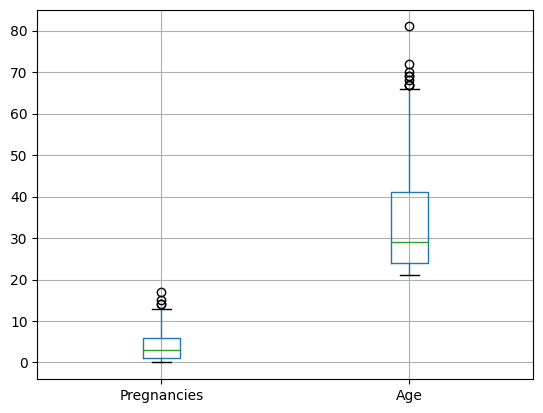

In [21]:
df.boxplot(column=['Pregnancies', 'Age'])

In [22]:
# Hitung kuartil pertama (Q1)
q1 = df['Pregnancies'].quantile(0.25)

# Hitung kuartil ketiga (Q3)
q3 = df['Pregnancies'].quantile(0.75)

# Hitung batas bawah (Lower Bound) dan batas atas
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Temukan outlier
outliers = df[(df['Pregnancies'] < lower_bound) | (df['Pregnancies'] > upper_bound)]

# Tampilkan outlier
print("Outlier Pregnancies : ")
print(outliers)

Outlier Pregnancies : 
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
88            15      136             70             32      110  37.1   
159           17      163             72             41      114  40.9   
298           14      100             78             25      184  36.6   
455           14      175             62             30        0  33.6   

     DiabetesPedigreeFunction  Age  Outcome  
88                      0.153   43        1  
159                     0.817   47        1  
298                     0.412   46        1  
455                     0.212   38        1  


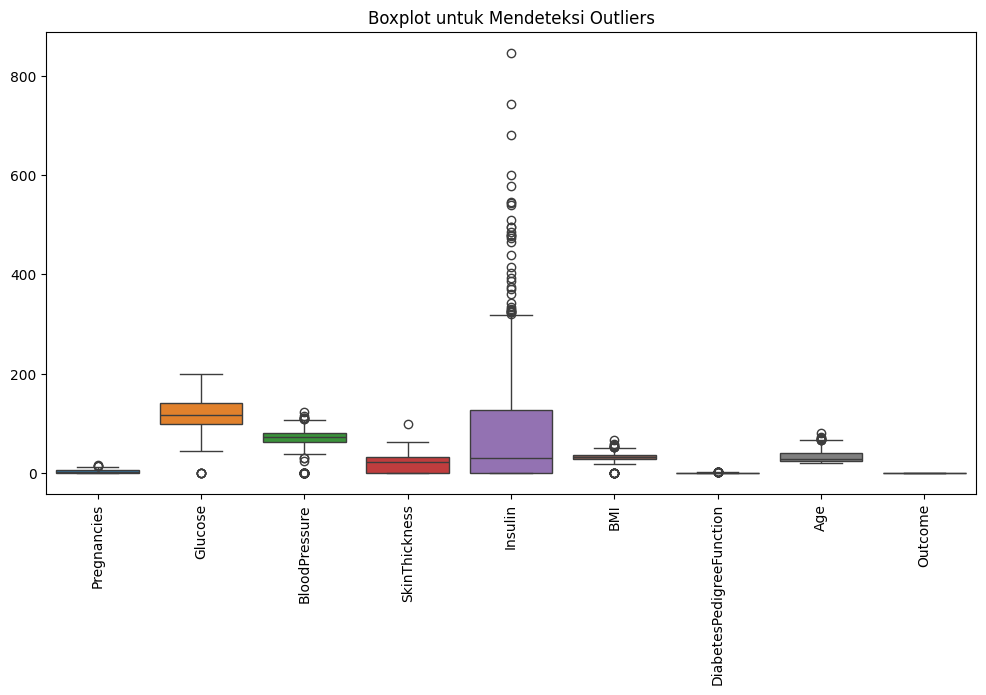

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title('Boxplot untuk Mendeteksi Outliers')
plt.show()

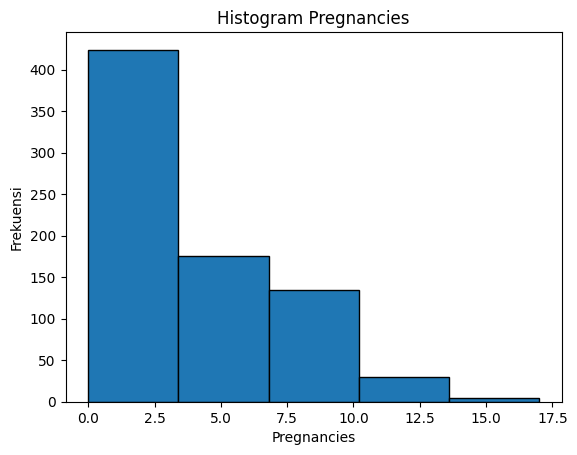

In [24]:
data_pregnancies = df['Pregnancies']

# Membuat histogram
n, bins, patches = plt.hist(data_pregnancies, bins=5, edgecolor='black')

# Menambahkan label sumbu x dan y
plt.xlabel('Pregnancies')
plt.ylabel('Frekuensi')

# Menambahkan judul plot
plt.title('Histogram Pregnancies')

# Menampilkan plot
plt.show()

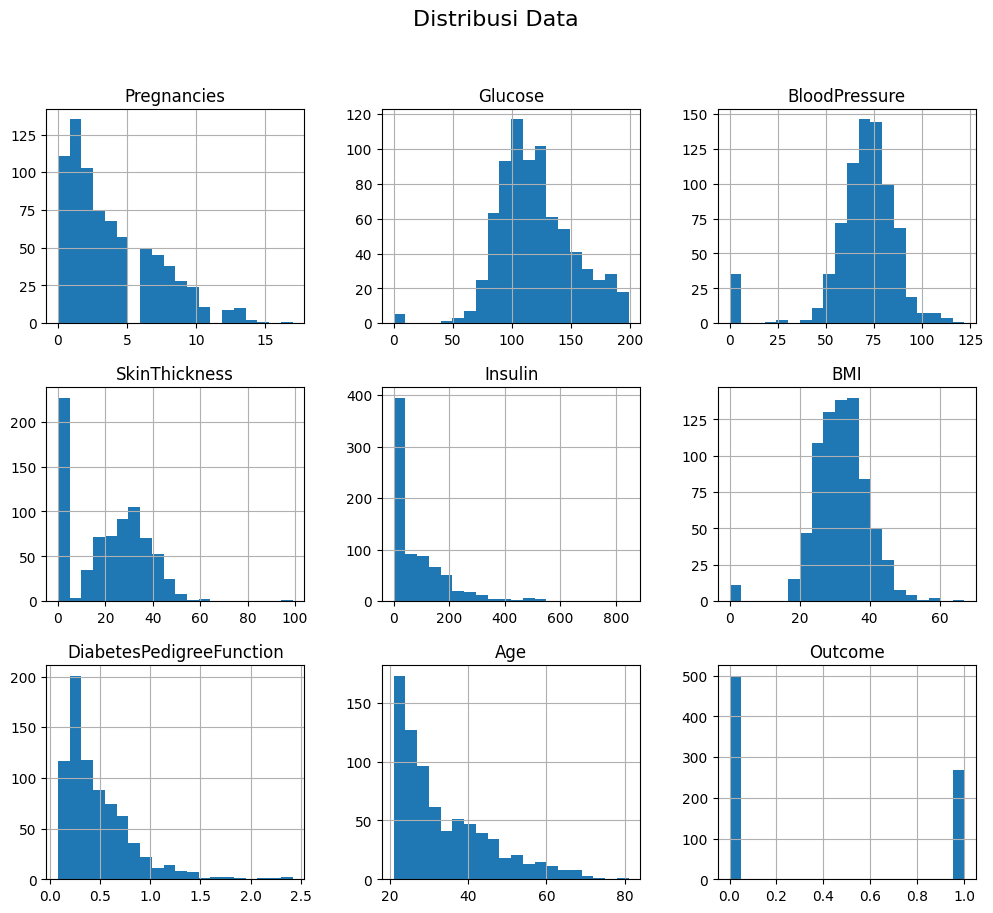

In [25]:
# Plot histogram untuk setiap kolom numerik

df.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribusi Data', size=16)
plt.show()

In [26]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['Pregnancies'] > upper_bound) | (df['Pregnancies'] < lower_bound))

# Drop baris yang memenuhi kondisi di atas(outliers)
df_cleaned = df[~outliers_condition]

# Menampilkan DataFrame yang telah dibersihkan dari outlier
print(df_cleaned.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


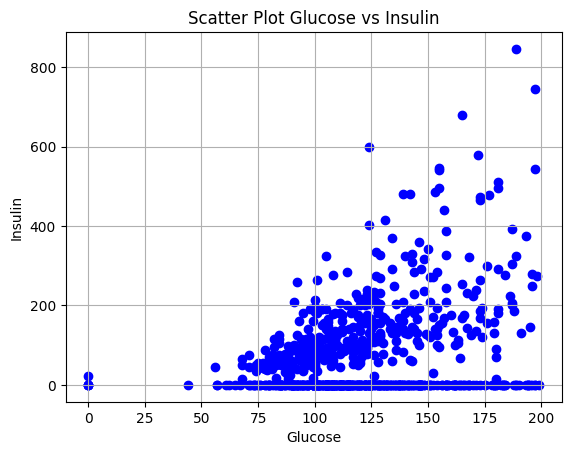

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file
file_path = '/content/drive/MyDrive/DatasetDM/diabetes.csv'
df = pd.read_csv(file_path)

df =pd.DataFrame(df)

plt.scatter(df['Glucose'], df['Insulin'], color='blue', marker='o')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter Plot Glucose vs Insulin')
plt.grid(True)
plt.show()

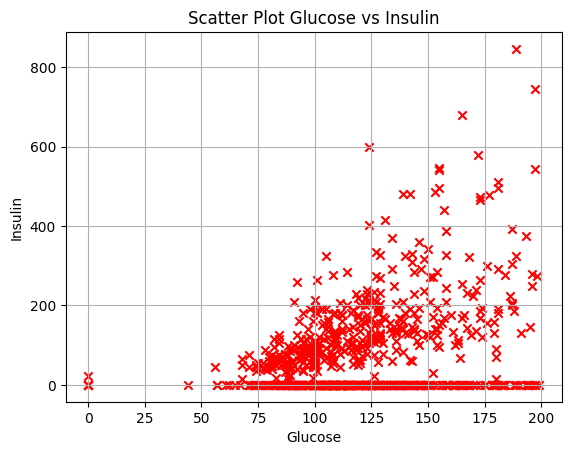

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file
file_path = '/content/drive/MyDrive/DatasetDM/diabetes.csv'
df = pd.read_csv(file_path)

df =pd.DataFrame(df)

plt.scatter(df['Glucose'], df['Insulin'], color='red', marker='x')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter Plot Glucose vs Insulin')
plt.grid(True)
plt.show()

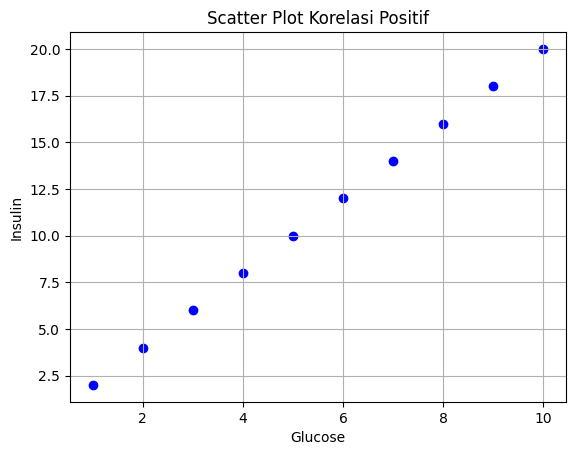

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {'Glucose': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Insulin': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Glucose'], df['Insulin'], color='blue', marker='o')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Positif')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

# Tampilkan plot
plt.grid(True)
plt.show()

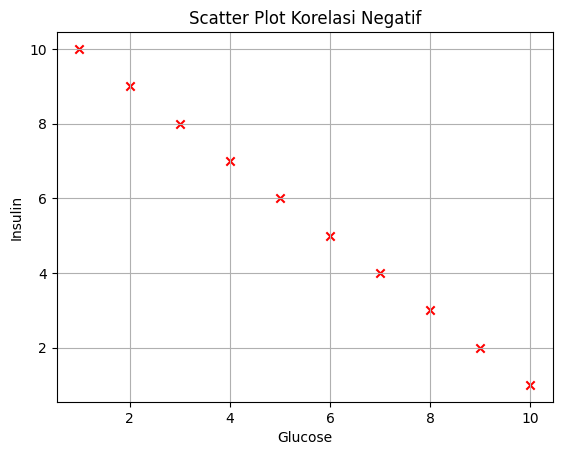

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Buat DataFrame contoh
data = {'Glucose': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'Insulin': [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]}

df = pd.DataFrame(data)

# Buat scatter plot
plt.scatter(df['Glucose'], df['Insulin'], color='red', marker='x')

# Tambahkan Label
plt.title('Scatter Plot Korelasi Negatif')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

# Tampilkan plot
plt.grid(True)
plt.show()